In [12]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats 

In [13]:
df = pd.read_csv('housing.csv')

In [14]:
# dropping unecessary columns

df.drop(['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
         'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)

In [15]:
df[['area','price']]

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


Text(0, 0.5, 'Price in dollars')

<Figure size 800x600 with 0 Axes>

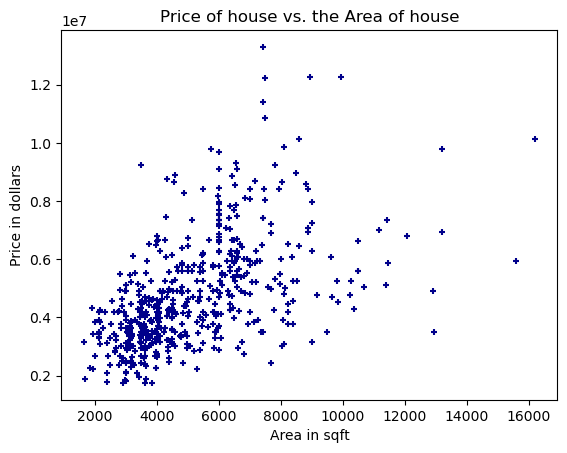

In [16]:
# Plotting the data

plt.figure(figsize=(8,6))
df.plot.scatter(x = 'area', y = 'price', c='DarkBlue', marker='+')

plt.title("Price of house vs. the Area of house")
plt.xlabel('Area in sqft')
plt.ylabel('Price in dollars')

In [17]:
# Standardizing the data 

df['area'] = stats.zscore(df['area']) 
df['price'] = stats.zscore(df['price']) 

In [18]:
# Splitting the data into dependant and indepedant variables

x = df['area'].iloc[:]
y = df['price'].iloc[:]

In [19]:
# Compute cost 

def compute_cost(x, y, w, b): 

    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [20]:
# Compute partial derivatives

def compute_gradient(x, y, w, b): 

    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        
        dj_db_i = f_wb - y[i]
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db += dj_db_i 
        dj_dw += dj_dw_i 
        
    dj_db = (1/m)*dj_db
    dj_dw = (1/m)*dj_dw

        
    return dj_dw, dj_db

In [23]:
# Compute gradient descent

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, learning_rate, num_iters): 

    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = w_in  
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, learning_rate and gradient
        w = w - learning_rate * dj_dw               
        b = b - learning_rate * dj_db               

        # Save cost J at each iteration
        if i<100000:     
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
   
    return w, b, J_history, w_history #return w and J,w history for graphing

In [24]:
# initialize fitting parameters. 
initial_w = 0.0
initial_b = 0.0

# some gradient descent settings
iterations = 1500
learning_rate = 0.01

w,b,_,_ = gradient_descent(x ,y, initial_w, initial_b, 
                     compute_cost, compute_gradient, learning_rate, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.50   
Iteration  150: Cost     0.36   
Iteration  300: Cost     0.36   
Iteration  450: Cost     0.36   
Iteration  600: Cost     0.36   
Iteration  750: Cost     0.36   
Iteration  900: Cost     0.36   
Iteration 1050: Cost     0.36   
Iteration 1200: Cost     0.36   
Iteration 1350: Cost     0.36   
w,b found by gradient descent: 0.5359971937392443 2.413808195117143e-16


In [25]:
# Predicted Y values (regression line)
    
y_pred = w * x + b   

Text(0.5, 0, 'Area')

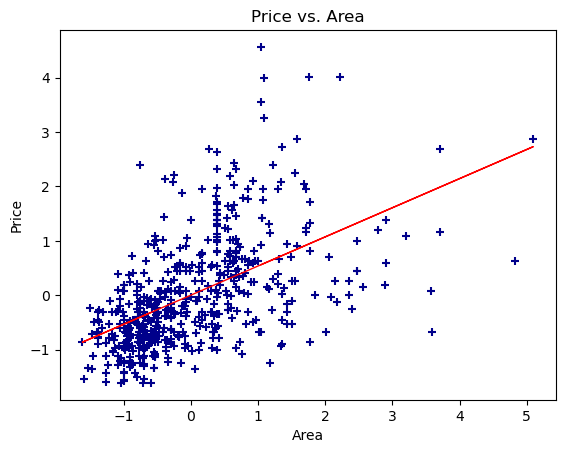

In [26]:
# Plot the linear fit
plt.plot(x, y_pred, c = "r", linewidth=1.0)

plt.scatter(x, y, c='DarkBlue', marker='+') 

plt.title("Price vs. Area")
plt.ylabel('Price')
plt.xlabel('Area')